# **Dataset**

In [1]:
!pip install py7zr wandb config -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 54.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 75.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.3/412.3 kB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.8/138.8 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 56.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.4/209.4 kB 22.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.4 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
from urllib.request import urlretrieve
import requests, zipfile, io, os
import py7zr
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans
import utils

dataset = "https://archive.ics.uci.edu/static/public/555/apartment+for+rent+classified.zip"

r = requests.get(dataset)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall("/rent")

In [3]:
print(os.listdir('/rent'))
with py7zr.SevenZipFile('/rent/apartments_for_rent_classified_10K.7z', mode='r') as z:
    z.extractall(path='/rent')

['apartments_for_rent_classified_10K.7z', 'apartments_for_rent_classified_100K.7z']


In [4]:
df = pd.read_csv('/rent/apartments_for_rent_classified_10K.csv',sep=";", encoding='cp1252')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             10000 non-null  int64  
 1   category       10000 non-null  object 
 2   title          10000 non-null  object 
 3   body           10000 non-null  object 
 4   amenities      6451 non-null   object 
 5   bathrooms      9966 non-null   float64
 6   bedrooms       9993 non-null   float64
 7   currency       10000 non-null  object 
 8   fee            10000 non-null  object 
 9   has_photo      10000 non-null  object 
 10  pets_allowed   8252 non-null   object 
 11  price          10000 non-null  int64  
 12  price_display  10000 non-null  object 
 13  price_type     10000 non-null  object 
 14  square_feet    10000 non-null  int64  
 15  address        6673 non-null   object 
 16  cityname       9923 non-null   object 
 17  state          9923 non-null   object 
 18  latitud

#   **EDA**

In [ ]:
df.describe()
df.shape
print(df.columns.tolist())
df.dtypes
df.head()

['id', 'category', 'title', 'body', 'amenities', 'bathrooms', 'bedrooms', 'currency', 'fee', 'has_photo', 'pets_allowed', 'price', 'price_display', 'price_type', 'square_feet', 'address', 'cityname', 'state', 'latitude', 'longitude', 'source', 'time']


,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",NaN,NaN,0.0,USD,No,Thumbnail,...,$790,Monthly,101,NaN,Washington,DC,38.9057,-76.9861,RentLingo,1577359415
1,5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",NaN,NaN,1.0,USD,No,Thumbnail,...,$425,Monthly,106,814 Schutte Rd,Evansville,IN,37.9680,-87.6621,RentLingo,1577017063
2,5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",NaN,1.0,0.0,USD,No,Thumbnail,...,"$1,390",Monthly,107,NaN,Arlington,VA,38.8910,-77.0816,RentLingo,1577359410
3,5659918074,housing/rent/apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",NaN,1.0,0.0,USD,No,Thumbnail,...,$925,Monthly,116,1717 12th Avenue,Seattle,WA,47.6160,-122.3275,RentLingo,1576667743
4,5668626759,housing/rent/apartment,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",NaN,NaN,0.0,USD,No,Thumbnail,...,$880,Monthly,125,NaN,Arlington,VA,38.8738,-77.1055,RentLingo,1577359401


In [ ]:
numerical_columns = df.select_dtypes(include=['float', 'int'])
summary_statistics = numerical_columns.describe()
print("Summary Statistics:\n", summary_statistics)

categorical_columns = df.select_dtypes(include=['object'])
for column in categorical_columns:
    if column != 'body' and column != 'title':
      unique_categories = df[column].unique()
      category_frequencies = df[column].value_counts()
      print(f"\nUnique Categories in {column}:")
      print(unique_categories)
      print(f"\nCategory Frequencies in {column}:")
      print(category_frequencies)

Summary Statistics:
                  id    bathrooms     bedrooms         price   square_feet  \
count  1.000000e+04  9966.000000  9993.000000  10000.000000  10000.000000   
mean   5.623396e+09     1.380544     1.744021   1486.277500    945.810500   
std    7.021025e+07     0.615410     0.942354   1076.507968    655.755736   
min    5.508654e+09     1.000000     0.000000    200.000000    101.000000   
25%    5.509248e+09     1.000000     1.000000    949.000000    649.000000   
50%    5.668610e+09     1.000000     2.000000   1270.000000    802.000000   
75%    5.668626e+09     2.000000     2.000000   1695.000000   1100.000000   
max    5.668663e+09     8.500000     9.000000  52500.000000  40000.000000   

          latitude    longitude          time  
count  9990.000000  9990.000000  1.000000e+04  
mean     37.695162   -94.652247  1.574891e+09  
std       5.495851    15.759805  3.762395e+06  
min      21.315500  -158.022100  1.568744e+09  
25%      33.679850  -101.301700  1.568781e+09

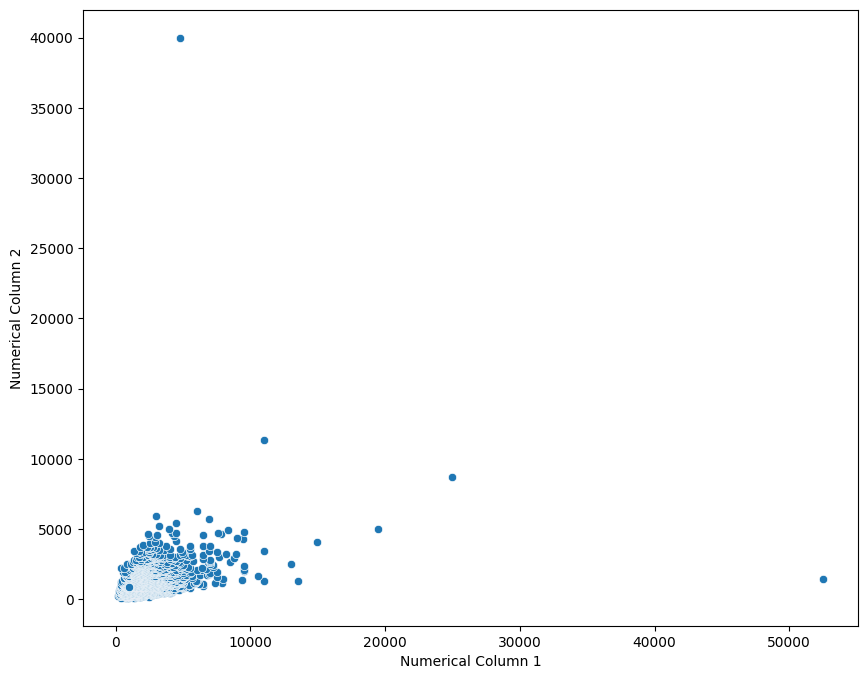

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Distribution of numerical variables
numerical_columns = df.select_dtypes(include=['float', 'int'])
numerical_columns.hist(bins=10, figsize=(10, 8))
plt.tight_layout()
plt.show()

# Frequency distribution of categorical variables
categorical_columns = df.select_dtypes(include=['object'])
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    category_counts = df[column].value_counts()
    sns.barplot(x=category_counts.index, y=category_counts.values)
    plt.xlabel(column) # Need to fix the categories
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Relationship between variables using scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='price', y='square_feet', data=df)
plt.xlabel('Numerical Column 1')
plt.ylabel('Numerical Column 2')
plt.show()

# Heatmap of correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


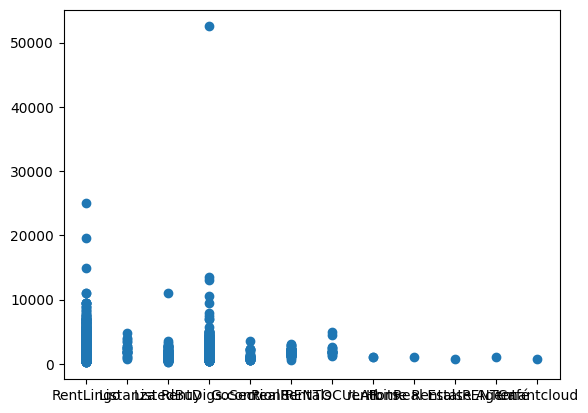

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(df['source'], df['price'])

# **2d: Format Dataset**

In [5]:
# remove title, body, id and address columns because they dont help us: diffrent value for each sample.
# removing currecy, price_display, price_type, category and fee columns because they are constant
# removing category as well because is is almost constant
# Drop unnecessary columns
columns_to_drop = ['id', 'title', 'body', 'address', 'fee', 'currency', 'category', 'price_display', 'price_type']
df = df.drop(columns_to_drop, axis=1)

# Convert 'source' column to string
df['source'] = df['source'].astype(str)

# Separate the ground truth column
ground_truth = df.pop('source')

# Scale numeric columns
numeric_columns = ['bedrooms', 'bathrooms', 'price', 'square_feet', 'latitude', 'longitude', 'time']
numeric_df = df[numeric_columns]
df = df.drop(numeric_columns, axis=1)
scaled_df = utils.standard_scaler(numeric_df)

# Concatenate scaled numeric columns and remaining columns
df = pd.concat([scaled_df, df], axis=1)

# Transform selected categorical columns to numerical columns
categorical_columns = ['amenities', 'pets_allowed', 'cityname', 'state']
df = utils.transform_to_numerical_columns(df, categorical_columns)

# Display the resulting DataFrame
df.head()


the dataframe is of shape(10000, 7)
Number of numerical columns 7


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,bedrooms,bathrooms,price,square_feet,latitude,longitude,time,has_photo,amenities_AC,"amenities_AC,Alarm,Cable or Satellite,Clubhouse,Dishwasher,Fireplace,Garbage Disposal,Internet Access,Parking,Patio/Deck,Playground,Refrigerator,Washer Dryer",...,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,state_nan
0,-1.850799,NaN,-0.646825,-1.288365,0.220275,1.121018,0.656062,Thumbnail,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.789574,NaN,-0.985901,-1.280740,0.049647,0.443565,0.565064,Thumbnail,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.850799,-0.618389,-0.089439,-1.279215,0.217600,1.114958,0.656060,Thumbnail,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.850799,-0.618389,-0.521413,-1.265489,1.805241,-1.756154,0.472214,Thumbnail,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-1.850799,NaN,-0.563217,-1.251764,0.214470,1.113442,0.656058,Thumbnail,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
mapping = {'Yes': 1, 'Thumbnail': 1, 'No': 0}
df = utils.transform_column_mapping(df, {'has_photo': mapping} )

1    9816
0     184
Name: has_photo, dtype: int64


In [7]:
print(f'df shape before removing null rows: {df.shape}')
df = df.dropna()
print(f'df shape after removing null rows: {df.shape}')

df.head()

df shape before removing null rows: (10000, 3895)
df shape after removing null rows: (9950, 3895)


,bedrooms,bathrooms,price,square_feet,latitude,longitude,time,has_photo,amenities_AC,"amenities_AC,Alarm,Cable or Satellite,Clubhouse,Dishwasher,Fireplace,Garbage Disposal,Internet Access,Parking,Patio/Deck,Playground,Refrigerator,Washer Dryer",...,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,state_nan
2,-1.850799,-0.618389,-0.089439,-1.279215,0.217600,1.114958,0.656060,1,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.850799,-0.618389,-0.521413,-1.265489,1.805241,-1.756154,0.472214,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,-1.850799,-0.618389,0.918499,-1.244139,0.558220,1.311233,0.637554,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,-1.850799,-0.618389,0.008103,-1.231939,0.011780,-1.763159,0.655769,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,-1.850799,-0.618389,0.193898,-1.152637,0.011780,-1.763159,0.564548,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


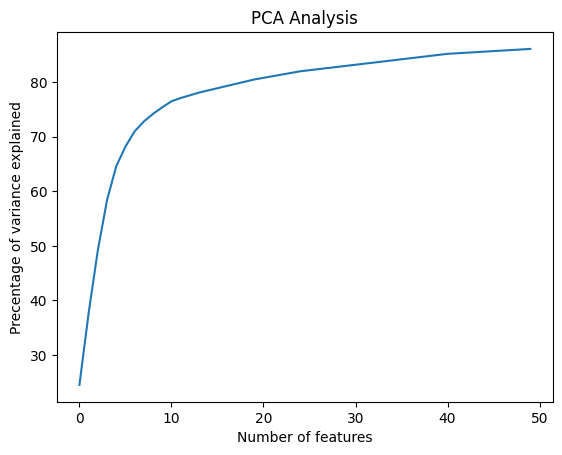

In [8]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

pca = PCA(n_components=50)
pca.fit(df)
variance = pca.explained_variance_ratio_
var = np.cumsum(np.round(variance, 3)*100)
plt.ylabel('Precentage of variance explained')
plt.xlabel('Number of features')
plt.title('PCA Analysis')
plt.plot(var)
plt.show()

pca = PCA(n_components=10)
df_pca = pca.fit_transform(df)

# **3a & 3b: Selecting the optimal number of clusters**

# 4: **Main Expriment**

**DBSCAN (Density-Based Spatial Clustering of Applications with Noise):**

*Epsilon (**eps**):* It determines the radius within which neighboring points are considered part of a cluster. Increasing the value of epsilon can result in larger neighborhoods and potentially merge multiple clusters into a single cluster. Decreasing epsilon can lead to more fragmented clusters.

*Minimum samples (min_samples):* It sets the minimum number of neighboring points required for a point to be considered a core point and form a cluster. Increasing the value of min_samples can make it harder for points to meet the density criteria, resulting in fewer clusters. Decreasing min_samples can lead to more clusters.


**Agglomerative Clustering:**

*Number of clusters (**n_clusters**):* This hyperparameter directly controls the number of clusters. By setting the desired number of clusters, you can control the output.

*Linkage:* The linkage criterion determines how the distance between clusters is calculated during the merging process. Different linkage methods can result in different cluster structures, indirectly affecting the number of clusters. Common linkage options include "ward", "complete", "average", and "single".



**OPTICS (Ordering Points to Identify the Clustering Structure):**

***Min_samples***: It specifies the minimum number of neighboring points required for a point to be considered a core point. Increasing the value of min_samples can make it harder for points to meet the density criteria, resulting in fewer clusters. Decreasing min_samples can lead to more clusters.

*Xi:* It sets the minimum steepness of the reachability plot. A higher value of xi can result in fewer clusters, as it requires a steeper increase in reachability distance for cluster extraction. Decreasing xi can lead to more clusters.




Working on KMeans


  9%|▉         | 7/80 [03:37<37:11, 30.56s/it]

 14%|█▍        | 11/80 [05:40<35:04, 30.50s/it]

 52%|█████▎    | 42/80 [21:42<20:06, 31.74s/it]

 98%|█████████▊| 78/80 [41:01<01:07, 33.82s/it]

100%|██████████| 80/80 [42:08<00:00, 31.60s/it]


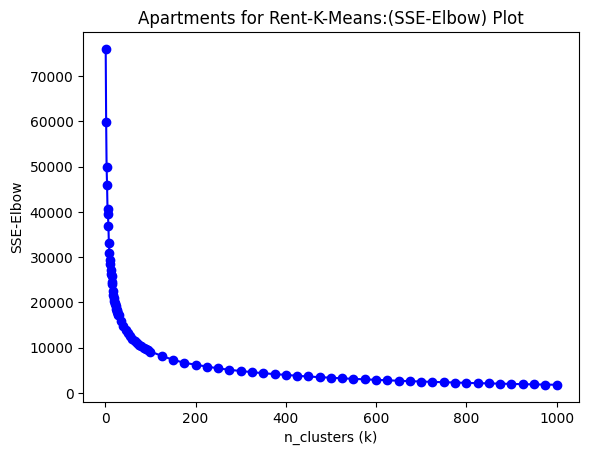

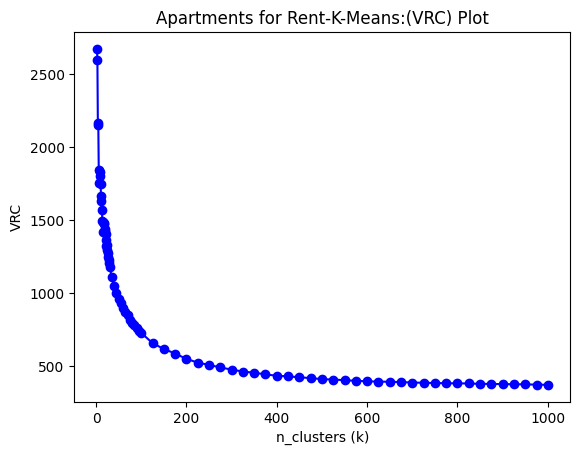

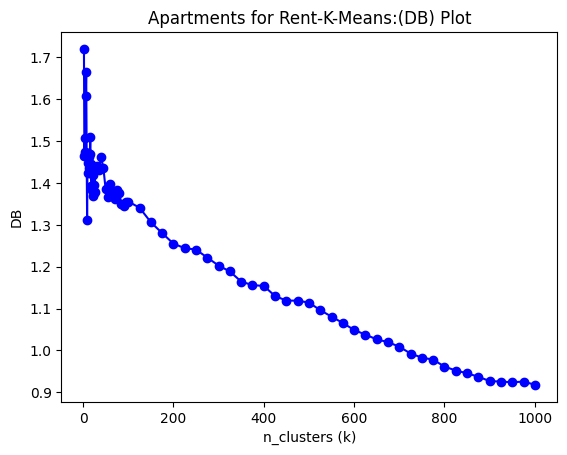

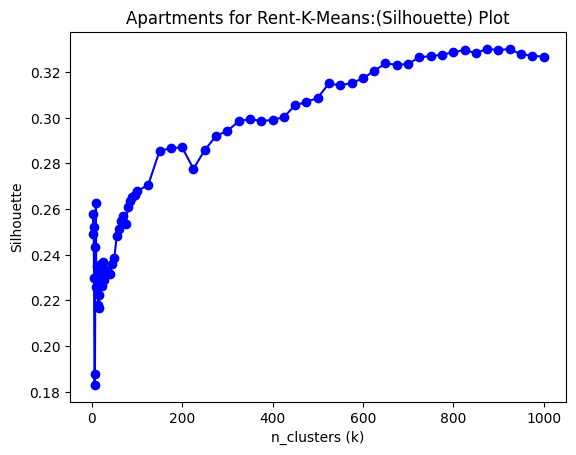

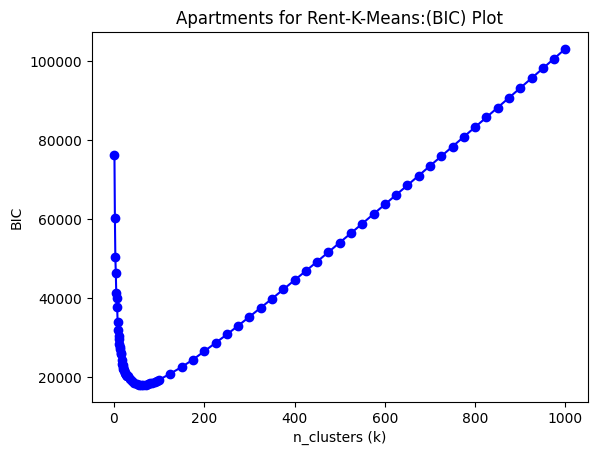

/usr/local/lib/python3.10/dist-packages/plotly/matplotlylib/renderer.py:647: UserWarning:

Looks like the annotation(s) you are trying 
to draw lies/lay outside the given figure size.

Therefore, the resulting Plotly figure may not be 
large enough to view the full text. To adjust 
the size of the figure, use the 'width' and 
'height' keys in the Layout object. Alternatively,
use the Margin object to adjust the figure's margins.



Working on DBSCAN


100%|██████████| 20/20 [12:36<00:00, 37.83s/it]


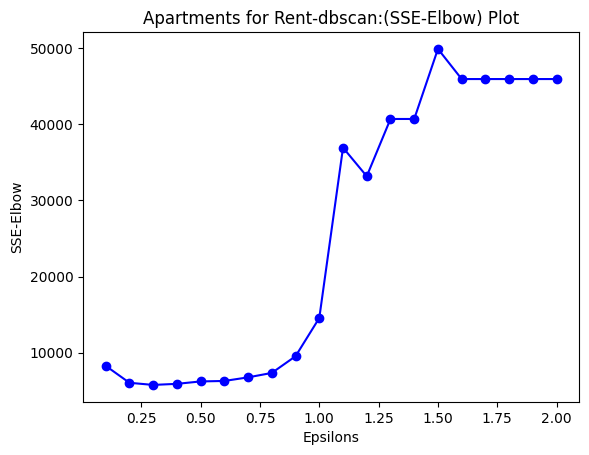

Working on OPTICS


  0%|          | 0/20 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_optics.py:932: RuntimeWarning:

divide by zero encountered in true_divide

 80%|████████  | 16/20 [22:00<05:27, 81.84s/it]

100%|██████████| 20/20 [27:28<00:00, 82.40s/it]


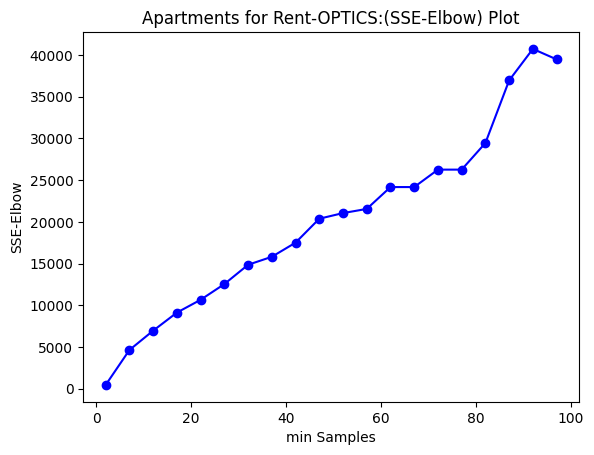

Working on AgglomerativeClustering


 70%|███████   | 14/20 [09:45<04:12, 42.15s/it]

100%|██████████| 20/20 [14:05<00:00, 42.28s/it]


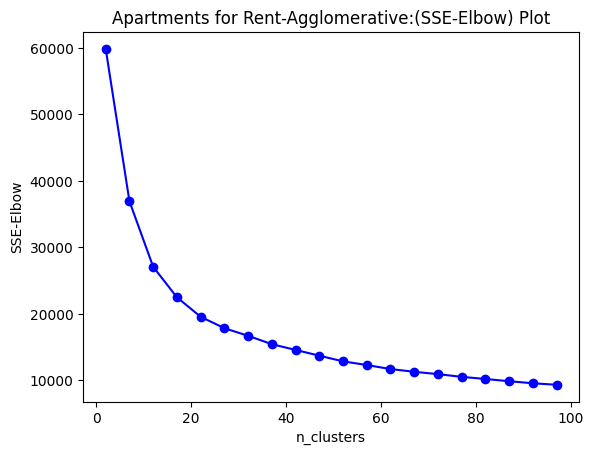

In [9]:
df_pca = pd.DataFrame(df_pca)


# Add ground truth column to save preprocessed data frame for submission
df_pca['ground_truth'] = ground_truth
df_pca.to_csv('Preprocessed data - Apartments for Rent Dataset', index=True)
num_of_clusters = df_pca['ground_truth'].unique()
len(num_of_clusters)

# remove ground truth column and start calculations
ground_truth = df_pca.pop('ground_truth')
df_pca.head()
utils.calc_scores_for_all(df_pca, 'Apartments for Rent')